## CONJOINT

In [1]:
#Import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We have collected 122 answers from the conjoint survey.

In [2]:
file_csv = "conjoint_rawdata.csv"
survey_raw = pd.read_csv(file_csv)
survey_raw.head()

,Informazioni cronologiche,In che genere ti identifichi?,Qual è la tua età?,Qual è la tua occupazione?,Da quante persone è composto il tuo nucleo familiare?,Dove abiti al momento?,Quanto spesso consumi pesce?,"In media, quante delle volte che consumi pesce, il pesce è surgelato?",Che tipo di pesce surgelato consumi?\r\n(Puoi selezionare più risposte),Hai una marca di fiducia per l’acquisto di prodotti di pesce surgelati?,...,"10. Spiedino di Salmone croccanti al Panko e con Prezzemolo e Basilico, pronto in più di 15 minuti e venduto in confezioni per due persone","11. Spiedino di Calamaro croccanti al Panko e con Salvia e Rosmarino, pronto in meno di 8 minuti e venduto in monoporzioni","12. Spiedino di Calamaro croccanti al Panko e con nessuna spezia, pronto in 8-15 minuti e venduto in monoporzioni","13. Spiedino di Gambero Gratinato con Prezzemolo e Basilico, pronto in 8-15 minuti e venduto in monoporzioni","14. Spiedino di Gambero Gratinato con Salvia e Rosmarino, pronto in più di 15 minuti e venduto in monoporzioni","15. Spiedino di Salmone Gratinato con Salvia e Rosmarino, pronto in meno di 8 minuti e venduto in confezioni famiglia","16. Spiedino di Salmone Gratinato con nessuna spezia, pronto in 8-15 minuti e venduto in confezioni per due persone","17. Spiedino di Calamaro Gratinato con nessuna spezia, pronto in meno di 8 minuti e venduto in confezioni per due persone","18. Spiedino di Calamaro Gratinato con Prezzemolo e Basilico, pronto in più di 15 minuti e venduto in confezioni famiglia",Quali sono le caratteristiche che hanno influenzato di più la tua valutazione?\r\n(Puoi selezionare più risposte)
0,2025/01/24 10:32:13 AM CET,Femminile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Piatti pronti;Tranci/Filetti di pesce,No,...,9.0,8.0,2.0,8.0,7.0,2.0,8.0,3.0,4.0,Tipo di pesce utilizzato per lo spiedino surge...
1,2025/01/24 10:33:56 AM CET,Femminile,18-25,Lavoratore,4+,Nord Italia,Mai,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025/01/24 10:52:44 AM CET,Maschile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Piatti pronti,Si,...,7.0,10.0,9.0,8.0,8.0,7.0,8.0,10.0,9.0,Tipo di pesce utilizzato per lo spiedino surge...
3,2025/01/24 11:58:14 AM CET,Femminile,60-70,Lavoratore,1,Nord Italia,Una/due volte al mese,Spesso,Condimenti per pasta o riso;Tranci/Filetti di ...,No,...,8.0,4.0,2.0,10.0,10.0,1.0,8.0,3.0,0.0,Tipo di pesce utilizzato per lo spiedino surge...
4,2025/01/24 11:59:33 AM CET,Maschile,26-35,Lavoratore,1,Nord Italia,Più volte a settimana,Spesso,Condimenti per pasta o riso;Tranci/Filetti di ...,No,...,7.0,6.0,6.0,5.0,5.0,9.0,7.0,7.0,9.0,Tipo di pesce utilizzato per lo spiedino surge...


We wanted to understand the percentage of respondents who never eat fish...

In [3]:
count_mai = survey_raw['Quanto spesso consumi pesce?'].value_counts().get('Mai', 0)
total_rows = len(survey_raw)

percentage_mai = (count_mai / total_rows) * 100

print(f"The percentage of respondents who don't eat fish is {percentage_mai:.2f}%")

The percentage of respondents who don't eat fish is 6.56%


... and those who never eat frozen fish.

In [4]:
count_nofrozen = survey_raw['In media, quante delle volte che consumi pesce, il pesce è surgelato?'].value_counts().get('Mai', 0)
#count_nofrozen #19
total_responses_frozen = len(survey_raw[survey_raw['Quanto spesso consumi pesce?'] != 'Mai'])
#total_responses_frozen #114
percentage_nofrozen = (count_nofrozen / total_responses_frozen) * 100

print(f"The percentage of respondents who don't eat frozen fish is {percentage_nofrozen:.2f}%")

The percentage of respondents who don't eat frozen fish is 16.67%


A quali condizioni considereresti l'acquisto di prodotti di pesce surgelati?

Dividerei le risposte in sottocategorie come segue: 
Mai:
 - Mai
 - Mai, perché abito in una città sul mare
 - Non lo prendo in considerazione mai
 - Non lo mangerei mai surgelato
 - Non li acquisterei mai
 - In luoghi lontani dal mare
 - Se non abitassi in un posto di mare
 - Per necessità urgente in mancanza di pescato
 - In caso di emergenza
 - Solo se non riesco ad andare in pescheria per comprarlo fresco. Piuttosto faccio la scorta e me lo sporziono e lo congelo nel mio freezer
 - Se mio marito non facesse lo schifiltoso

        -> non possiamo costringerli a trasferirsi, a cambiare marito o a non andare in pescheria, quindi li escluderei a priori

Spiraglio di luce:
 - Se so che sono stati pescati
 - Che sia congelato correttamente
 - Per fare pietanze cotte

        -> farei una considerazione sulla "qualità"

Altro:
 - ?
 - non lo considererei, sì solo ai bastoncini di pesce (son comunque prodotti di pesce surgelato, cosa mi cambia dai bastoncini di pesce agli spiedini di pesce?? nulla)



Non si possono fare molte considerazioni a mio parere su questa parte, dato che non abbiamo ottenuto risposte molto utili. Direi solo che alcuni respondents comprerebbero un prodotto surgelato solamente se viene data indicazione sull'origine del prodotto ("se so che sono stati pescati", piuttosto che presi da allevamento suppongo) o sulla modalità di congelamento.
Possibile commento finale:
"Nel sample che abbiamo non ci sono condizioni particolari per acquisire nuovi potenziali clienti. E' però da notare l'importanza della trasparenza nei confronti del cliente che emerge da alcune risposte: alcuni respondents affermano che comprerebbero prodotti di pesce surgelato se fossero rassicurati sull'origine e la modalità di congelamento del prodotto."

"In the sample, there are no particular conditions for acquiring new potential customers. However, it is important to note the significance of transparency towards the customer: some respondents state that they would buy frozen fish products if they were reassured about the origin and the freezing method of the product."

In [5]:
#c'è da fare considerazioni simili anche per la domanda "Quali caratteristiche di una marca ti portano a sceglierla come la tua marca di fiducia?"

After obtaining these two results, we can compute the percentage of potential customers.

In [6]:
#infine capire sul totale la percentuale che possono essere nostri possibili clienti
eat_fish = total_rows * (1 - percentage_mai / 100)

potential_customers = eat_fish * (1 - percentage_nofrozen / 100)

percentage_potential_customers = round((potential_customers / total_rows) * 100, 2)

print(f"The percentage of potential customers is {percentage_potential_customers} of the sample.")

The percentage of potential customers is 77.87 of the sample.


### DATASET ADJUSTMENTS AND EDA ANALYSIS

In [7]:
print(survey_raw.columns)

Index(['Informazioni cronologiche', 'In che genere ti identifichi?',
       'Qual è la tua età?', 'Qual è la tua occupazione?',
       'Da quante persone è composto il tuo nucleo familiare?',
       'Dove abiti al momento?', 'Quanto spesso consumi pesce?',
       'In media, quante delle volte che consumi pesce, il pesce è surgelato?',
       'Che tipo di pesce surgelato consumi?\r\n(Puoi selezionare più risposte)',
       'Hai una marca di fiducia per l’acquisto di prodotti di pesce surgelati?',
       'Quali caratteristiche di una marca ti portano a sceglierla come la tua marca di fiducia? ',
       'Tendi ad acquistare sempre il prodotto di pesce surgelato più economico?',
       'Qual è la ragione principale per cui non consumi pesce?',
       'A quali condizioni considereresti l'acquisto di prodotti di pesce surgelati?',
       '1. Spiedino di Gambero con nessuna panatura e nessuna spezia, pronto in meno di 8 minuti e venduto in confezioni famiglia',
       '2. Spiedino di Gambero 

In [8]:
survey_raw = survey_raw.drop('Informazioni cronologiche', axis=1)

We renamed the columns in order to simplify the analysis.

In [9]:
renamed_col = {
    'In che genere ti identifichi?': 'gender',
    'Qual è la tua età?': 'age',
    'Qual è la tua occupazione?': 'occupation',
    'Da quante persone è composto il tuo nucleo familiare?': 'family_size',
    'Dove abiti al momento?': 'location',
    'Quanto spesso consumi pesce?': 'fish_consumption_frequency',
    'In media, quante delle volte che consumi pesce, il pesce è surgelato?': 'frozen_fish_consumption_frequency',
    'Che tipo di pesce surgelato consumi?\r\n(Puoi selezionare più risposte)': 'frozen_fish_type',
    'Hai una marca di fiducia per l’acquisto di prodotti di pesce surgelati?': 'trusted_brand',
    'Quali caratteristiche di una marca ti portano a sceglierla come la tua marca di fiducia? ':'reason_to_trust',
    'Tendi ad acquistare sempre il prodotto di pesce surgelato più economico?': 'buy_cheapest_frozen_fish',
    'Qual è la ragione principale per cui non consumi pesce?':'reason_to_not_consume',
    'A quali condizioni considereresti l\'acquisto di prodotti di pesce surgelati?':'conditions_to_consume',
    "1. Spiedino di Gambero con nessuna panatura e nessuna spezia, pronto in meno di 8 minuti e venduto in confezioni famiglia": "Gambero_Nessuna_Nessuna_MenoDi8_Famiglia",
    "2. Spiedino di Gambero con nessuna panatura ma con Salvia e Rosmarino, pronto in 8-15 minuti e venduto in confezioni per 2 persone": "Gambero_Nessuna_SalviaRosmarino_8-15_Doppia",
    "3. Spiedino di salmone con nessuna panatura ma con Prezzemolo e Basilico, pronto in meno di 8 minuti e venduto in monoporzioni": "Salmone_Nessuna_PrezzemoloBasilico_MenoDi8_Mono",
    "4. Spiedino di Salmone con nessuna panatura e nessuna spezia, pronto in Più di 15 minuti e venduto in Monoporzioni": "Salmone_Nessuna_Nessuna_PiùDi15_Mono",
    "5. Spiedino di Calamaro con Nessuna panatura ma con Prezzemolo e Basilico, pronto in 8-15 minuti e venduto in confezioni famiglia": "Calamaro_Nessuna_PrezzemoloBasilico_8-15_Famiglia",
    '6. Spiedino di Calamaro con nessuna panatura ma con Salvia e Rosmarino, pronto in più di 15 minuti e venduto in confezioni da due persone':'Calamaro_Nessuna_SalviaRosmarino_PiùDi15_Doppia',
    '7. Spiedino di Gambero croccanti al Panko e con Prezzemolo e Basilico, pronto in meno di 8 minuti e venduto in confezioni per due persone\r\nNB. La panatura "Panko" è fatto con la sola mollica di pane bianco e rende le fritture particolarmente croccanti':'Gambero_Panko_PrezzemoloBasilico_MenoDi8_Doppia',
    '8. Spiedino di Gambero croccanti al Panko e nessuna spezia, pronto in più di 15 minuti e venduto in confezioni famiglia':'Gambero_Panko_Nessuna_PiùDi15_Famiglia',
    '9. Spiedino di  Salmone croccanti al Panko e con Salvia e Rosmarino, pronto in 8-15 minuti e venduto in confezioni famiglia':'Salmone_Panko_SalviaRosmarino_8-15_Famiglia',
    '10. Spiedino di Salmone croccanti al Panko e con Prezzemolo e Basilico, pronto in più di 15 minuti e venduto in confezioni per due persone':'Salmone_Panko_PrezzemoloBasilico_PiùDi15_Doppia',
    '11. Spiedino di Calamaro croccanti al Panko e con Salvia e Rosmarino, pronto in meno di 8 minuti e venduto in monoporzioni':'Calamaro_Panko_SalviaRosmarino_MenoDi8_Mono',
    '12. Spiedino di Calamaro croccanti al Panko e con nessuna spezia, pronto in 8-15 minuti e venduto in monoporzioni':'Calamaro_Panko_Nessuna_8-15_Mono',
    '13. Spiedino di Gambero Gratinato con Prezzemolo e Basilico, pronto in 8-15 minuti e venduto in monoporzioni':'Gambero_Gratinato_PrezzemoloBasilico_8-15_Mono',
    '14. Spiedino di Gambero Gratinato con Salvia e Rosmarino, pronto in più di 15 minuti e venduto in monoporzioni':'Gambero_Gratinato_SalviaRosmarino_PiùDi15_Mono',
    '15. Spiedino di Salmone Gratinato con Salvia e Rosmarino, pronto in meno di 8 minuti e venduto in confezioni famiglia':'Salmone_Gratinato_SalviaRosmarino_MenoDi8_Famiglia',
    '16. Spiedino di Salmone Gratinato con nessuna spezia, pronto in 8-15 minuti e venduto in confezioni per due persone':'Salmone_Gratinato_Nessuna_8-15_Doppia',
    '17. Spiedino di Calamaro Gratinato con nessuna spezia, pronto in meno di 8 minuti e venduto in confezioni per due persone':'Calamaro_Gratinato_Nessuna_MenoDi8_Doppia',
    '18. Spiedino di Calamaro Gratinato con Prezzemolo e Basilico, pronto in più di 15 minuti e venduto in confezioni famiglia':'Calamaro_Gratinato_PrezzemoloBasilico_PiùDi15_Famiglia',
    'Quali sono le caratteristiche che hanno influenzato di più la tua valutazione?\r\n(Puoi selezionare più risposte)':'major_influences'
}

survey_raw.rename(columns=renamed_col, inplace=True)

In [10]:
print(survey_raw.columns)

Index(['gender', 'age', 'occupation', 'family_size', 'location',
       'fish_consumption_frequency', 'frozen_fish_consumption_frequency',
       'frozen_fish_type', 'trusted_brand', 'reason_to_trust',
       'buy_cheapest_frozen_fish', 'reason_to_not_consume',
       'conditions_to_consume', 'Gambero_Nessuna_Nessuna_MenoDi8_Famiglia',
       'Gambero_Nessuna_SalviaRosmarino_8-15_Doppia',
       'Salmone_Nessuna_PrezzemoloBasilico_MenoDi8_Mono',
       'Salmone_Nessuna_Nessuna_PiùDi15_Mono',
       'Calamaro_Nessuna_PrezzemoloBasilico_8-15_Famiglia',
       'Calamaro_Nessuna_SalviaRosmarino_PiùDi15_Doppia',
       'Gambero_Panko_PrezzemoloBasilico_MenoDi8_Doppia',
       'Gambero_Panko_Nessuna_PiùDi15_Famiglia',
       'Salmone_Panko_SalviaRosmarino_8-15_Famiglia',
       'Salmone_Panko_PrezzemoloBasilico_PiùDi15_Doppia',
       'Calamaro_Panko_SalviaRosmarino_MenoDi8_Mono',
       'Calamaro_Panko_Nessuna_8-15_Mono',
       'Gambero_Gratinato_PrezzemoloBasilico_8-15_Mono',
       'Gamb

Plot of variables

C:\Users\melis\AppData\Local\Temp\ipykernel_33932\1606920924.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=processed_df, x=column, palette='Set2', ax=axes[i])
C:\Users\melis\AppData\Local\Temp\ipykernel_33932\1606920924.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=processed_df, x=column, palette='Set2', ax=axes[i])
C:\Users\melis\AppData\Local\Temp\ipykernel_33932\1606920924.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=processed_df, x=column, palette='Set2', ax=axes[i])
C:\Users\melis\AppData\Local

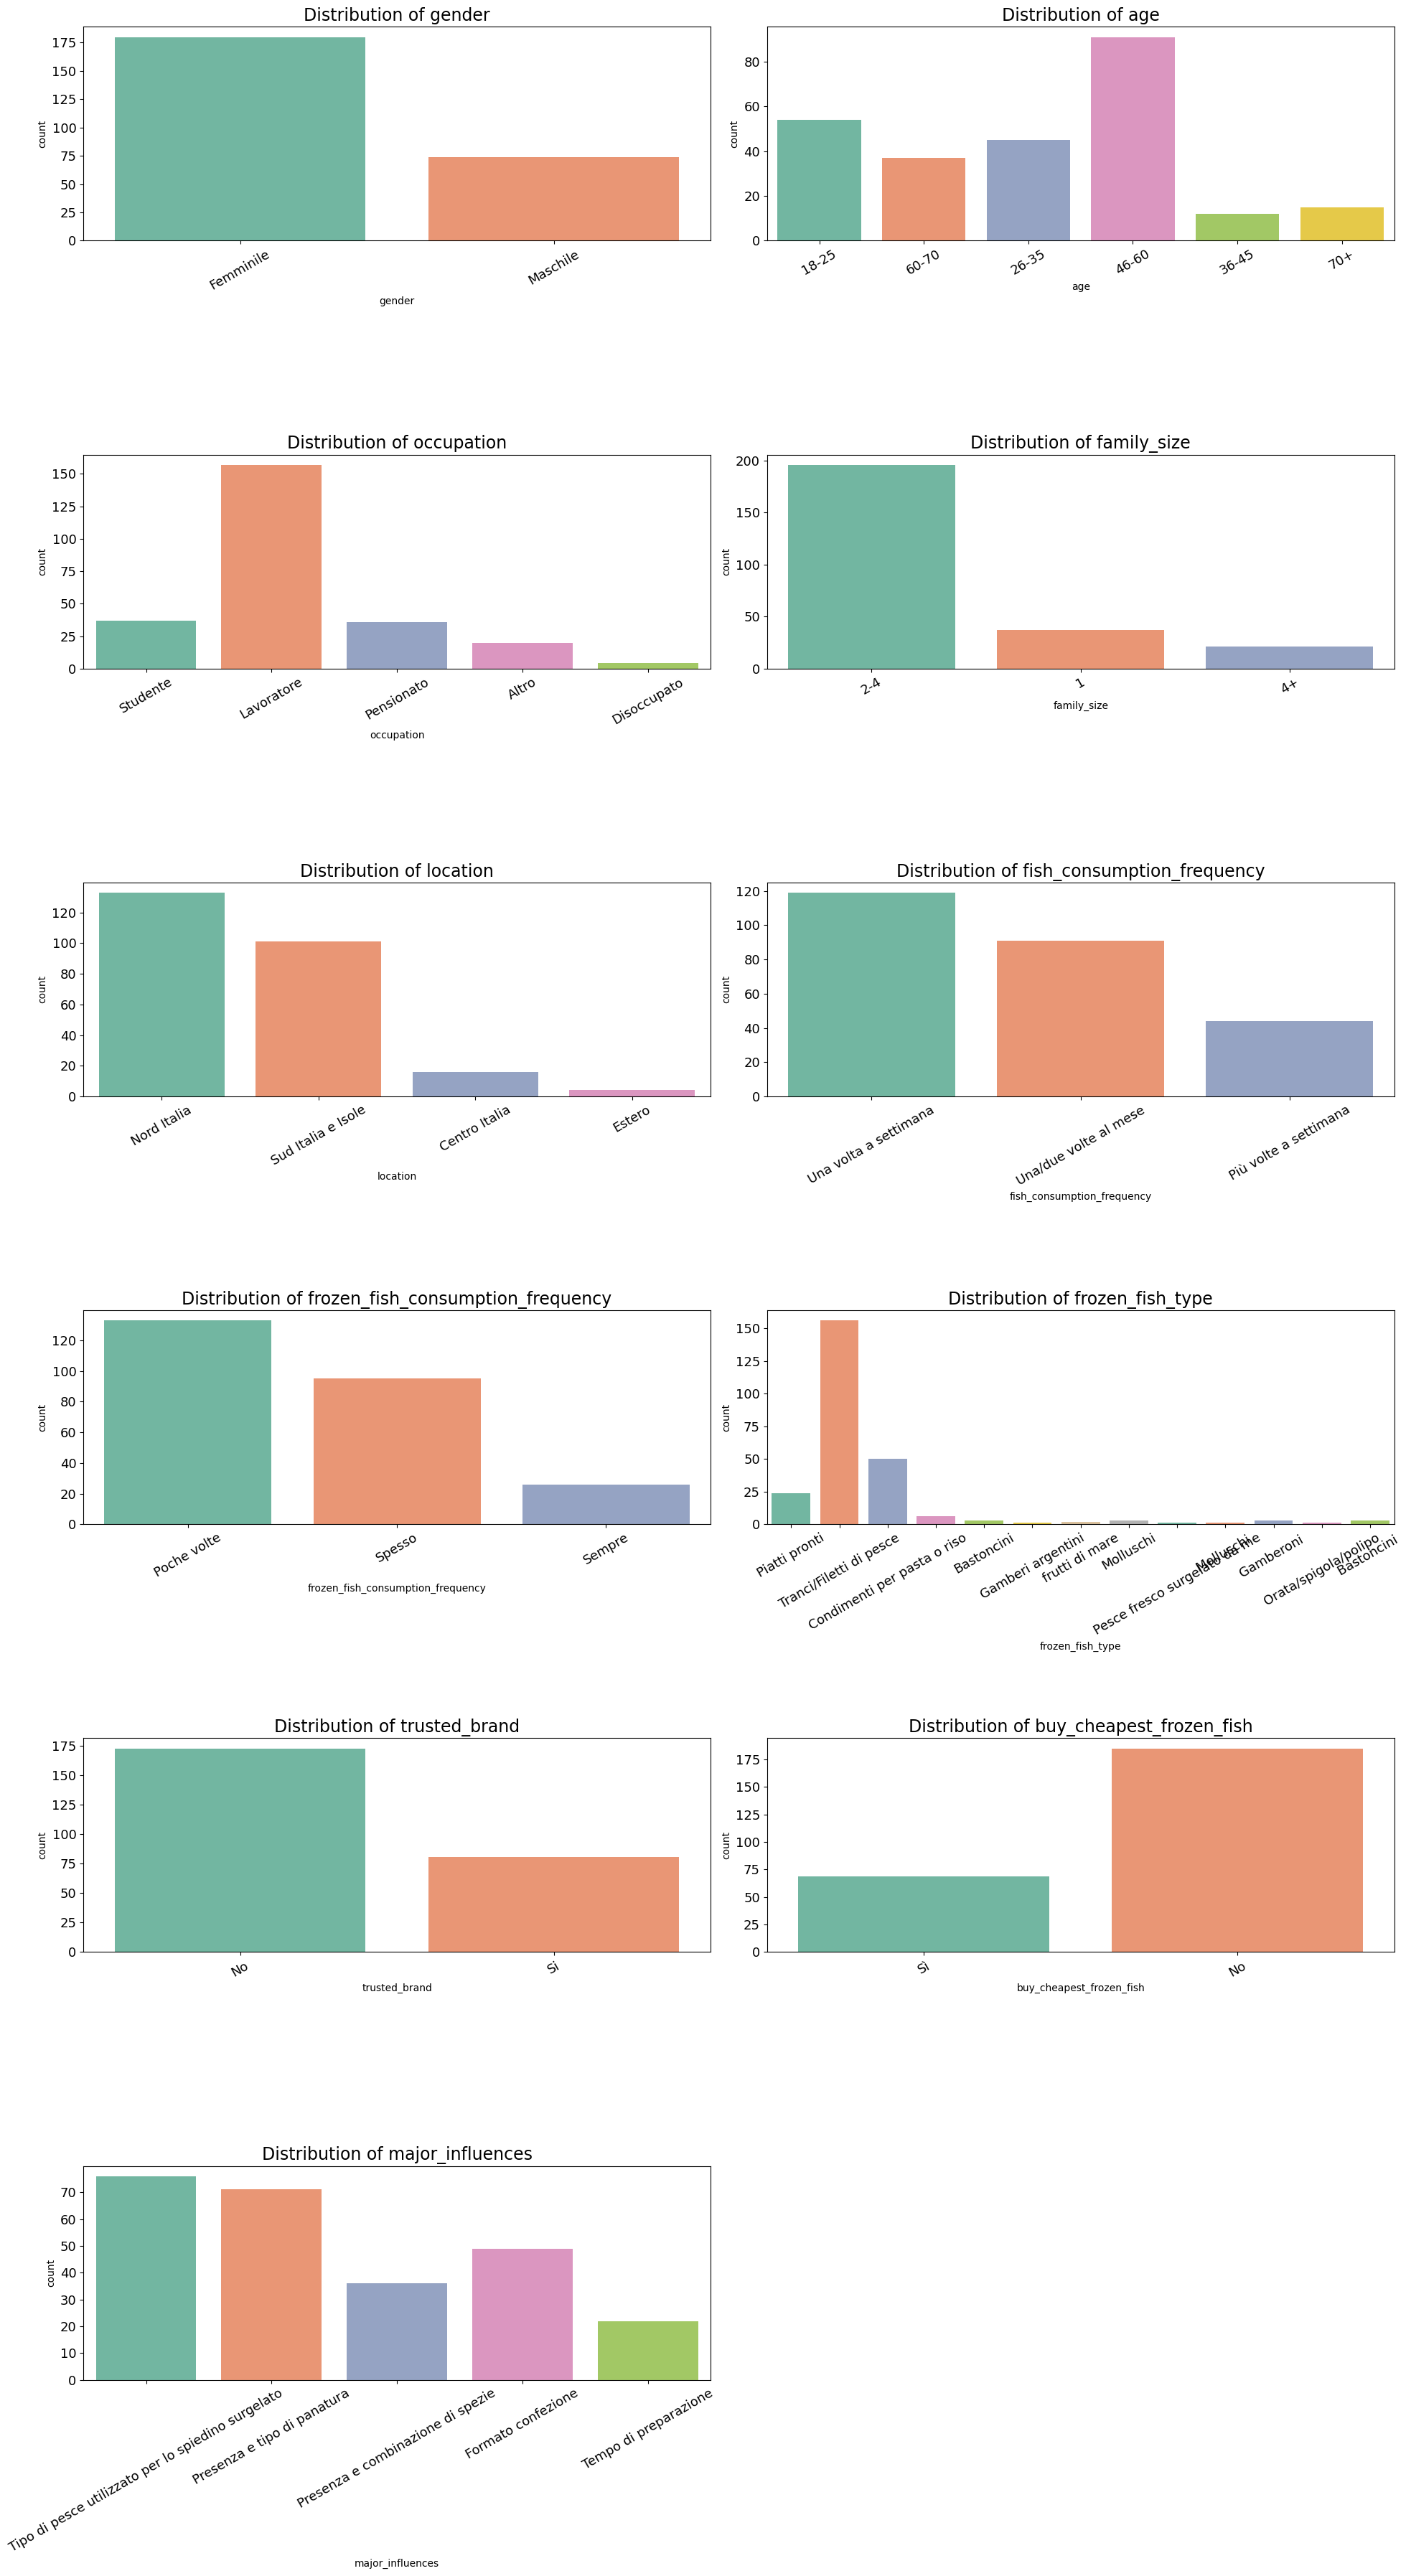

In [11]:
def plot_bar_grid(df, columns, cols=1, explode_columns=None, delimiter=','):
    if explode_columns is None:
        explode_columns = []

    processed_df = df.copy()

    # Explode columns with multiple choice
    for column in explode_columns:
        if column in processed_df.columns:
            processed_df = processed_df.dropna(subset=[column])  
            processed_df[column] = processed_df[column].str.split(delimiter)  
            processed_df = processed_df.explode(column)  

    total_plots = len(columns)  
    rows = (total_plots + cols - 1) // cols  

    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6))  # Crea i sottotitoli
    axes = axes.flatten()  # Appiattisce l'array di assi

    for i, column in enumerate(columns):
        if column in processed_df.columns:
            sns.countplot(data=processed_df, x=column, palette='Set2', ax=axes[i])
            axes[i].set_title(f'Distribution of {column}', fontsize=17)
            axes[i].tick_params(axis='x', rotation=30, labelsize=13)
            axes[i].tick_params(axis='y', labelsize=13)

    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.subplots_adjust(hspace=1)  
    plt.show()

columns_to_plot = [
    'gender', 'age', 'occupation', 'family_size', 'location',
       'fish_consumption_frequency', 'frozen_fish_consumption_frequency',
       'frozen_fish_type', 'trusted_brand',
       'buy_cheapest_frozen_fish',
       'major_influences'
]

plot_bar_grid(
    survey_raw,  
    columns_to_plot, 
    cols=2,  
    explode_columns=['frozen_fish_type','major_influences'],  
    delimiter=';'  
)

### CONJOINT ANALYSIS

In [12]:
survey_raw.head()

,gender,age,occupation,family_size,location,fish_consumption_frequency,frozen_fish_consumption_frequency,frozen_fish_type,trusted_brand,reason_to_trust,...,Salmone_Panko_PrezzemoloBasilico_PiùDi15_Doppia,Calamaro_Panko_SalviaRosmarino_MenoDi8_Mono,Calamaro_Panko_Nessuna_8-15_Mono,Gambero_Gratinato_PrezzemoloBasilico_8-15_Mono,Gambero_Gratinato_SalviaRosmarino_PiùDi15_Mono,Salmone_Gratinato_SalviaRosmarino_MenoDi8_Famiglia,Salmone_Gratinato_Nessuna_8-15_Doppia,Calamaro_Gratinato_Nessuna_MenoDi8_Doppia,Calamaro_Gratinato_PrezzemoloBasilico_PiùDi15_Famiglia,major_influences
0,Femminile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Piatti pronti;Tranci/Filetti di pesce,No,NaN,...,9.0,8.0,2.0,8.0,7.0,2.0,8.0,3.0,4.0,Tipo di pesce utilizzato per lo spiedino surge...
1,Femminile,18-25,Lavoratore,4+,Nord Italia,Mai,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Maschile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Piatti pronti,Si,Gusto e convenienza,...,7.0,10.0,9.0,8.0,8.0,7.0,8.0,10.0,9.0,Tipo di pesce utilizzato per lo spiedino surge...
3,Femminile,60-70,Lavoratore,1,Nord Italia,Una/due volte al mese,Spesso,Condimenti per pasta o riso;Tranci/Filetti di ...,No,NaN,...,8.0,4.0,2.0,10.0,10.0,1.0,8.0,3.0,0.0,Tipo di pesce utilizzato per lo spiedino surge...
4,Maschile,26-35,Lavoratore,1,Nord Italia,Più volte a settimana,Spesso,Condimenti per pasta o riso;Tranci/Filetti di ...,No,NaN,...,7.0,6.0,6.0,5.0,5.0,9.0,7.0,7.0,9.0,Tipo di pesce utilizzato per lo spiedino surge...


After this initial analysis, we will consider only those who consume frozen fish to proceed with our work.

In [13]:
survey_raw = survey_raw[~((survey_raw['fish_consumption_frequency'] == 'Mai') | 
                          (survey_raw['frozen_fish_consumption_frequency'] == 'Mai'))]


We added an id for every respondent

In [14]:
survey_raw['id_respondent'] = range(1, len(survey_raw) + 1)

We selected columns relevant for the conjoint analysis

In [15]:
relevant_columns = list(survey_raw.columns[13:31]) + [survey_raw.columns[-1]]  
survey_data = survey_raw[relevant_columns]

In [16]:
survey_data.head()

,Gambero_Nessuna_Nessuna_MenoDi8_Famiglia,Gambero_Nessuna_SalviaRosmarino_8-15_Doppia,Salmone_Nessuna_PrezzemoloBasilico_MenoDi8_Mono,Salmone_Nessuna_Nessuna_PiùDi15_Mono,Calamaro_Nessuna_PrezzemoloBasilico_8-15_Famiglia,Calamaro_Nessuna_SalviaRosmarino_PiùDi15_Doppia,Gambero_Panko_PrezzemoloBasilico_MenoDi8_Doppia,Gambero_Panko_Nessuna_PiùDi15_Famiglia,Salmone_Panko_SalviaRosmarino_8-15_Famiglia,Salmone_Panko_PrezzemoloBasilico_PiùDi15_Doppia,Calamaro_Panko_SalviaRosmarino_MenoDi8_Mono,Calamaro_Panko_Nessuna_8-15_Mono,Gambero_Gratinato_PrezzemoloBasilico_8-15_Mono,Gambero_Gratinato_SalviaRosmarino_PiùDi15_Mono,Salmone_Gratinato_SalviaRosmarino_MenoDi8_Famiglia,Salmone_Gratinato_Nessuna_8-15_Doppia,Calamaro_Gratinato_Nessuna_MenoDi8_Doppia,Calamaro_Gratinato_PrezzemoloBasilico_PiùDi15_Famiglia,id_respondent
0,4.0,5.0,3.0,2.0,4.0,3.0,9.0,6.0,7.0,9.0,8.0,2.0,8.0,7.0,2.0,8.0,3.0,4.0,1
2,8.0,8.0,6.0,7.0,8.0,6.0,8.0,8.0,7.0,7.0,10.0,9.0,8.0,8.0,7.0,8.0,10.0,9.0,2
3,5.0,9.0,10.0,7.0,0.0,6.0,10.0,2.0,0.0,8.0,4.0,2.0,10.0,10.0,1.0,8.0,3.0,0.0,3
4,10.0,8.0,6.0,5.0,8.0,7.0,8.0,10.0,9.0,7.0,6.0,6.0,5.0,5.0,9.0,7.0,7.0,9.0,4
5,6.0,7.0,6.0,5.0,8.0,8.0,6.0,8.0,6.0,6.0,8.0,6.0,7.0,6.0,7.0,5.0,8.0,8.0,5


In [17]:
columns_to_melt = survey_data.columns[:-1] 
columns_to_keep = [survey_data.columns[-1]] 

conjoint_data = pd.melt(survey_data, id_vars=columns_to_keep, value_vars=columns_to_melt, 
                  var_name='Question', value_name='Rating')
conjoint_data = conjoint_data.sort_values(by='id_respondent').reset_index(drop=True)

In [18]:
conjoint_data

,id_respondent,Question,Rating
0,1,Gambero_Nessuna_Nessuna_MenoDi8_Famiglia,4.0
1,1,Calamaro_Panko_SalviaRosmarino_MenoDi8_Mono,8.0
2,1,Salmone_Panko_PrezzemoloBasilico_PiùDi15_Doppia,9.0
3,1,Salmone_Nessuna_PrezzemoloBasilico_MenoDi8_Mono,3.0
4,1,Salmone_Gratinato_SalviaRosmarino_MenoDi8_Fami...,2.0
...,...,...,...
1705,95,Gambero_Gratinato_PrezzemoloBasilico_8-15_Mono,8.0
1706,95,Gambero_Gratinato_SalviaRosmarino_PiùDi15_Mono,8.0
1707,95,Salmone_Gratinato_SalviaRosmarino_MenoDi8_Fami...,6.0
1708,95,Gambero_Panko_Nessuna_PiùDi15_Famiglia,8.0


We splitted the questions of preferred bundles in order to obtain different answers for each attribute of the bundle

In [19]:
split_columns = conjoint_data["Question"].str.split("_", expand=True)
split_columns.columns = ["Tipo_di_Pesce", "Panatura", "Spezie", "Tempo_di_Preparazione", 'Formato_Confezione']

conjoint_data= pd.concat([conjoint_data, split_columns], axis=1)

conjoint_data.drop(columns=["Question"], inplace=True)

In [20]:
conjoint_data

,id_respondent,Rating,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
0,1,4.0,Gambero,Nessuna,Nessuna,MenoDi8,Famiglia
1,1,8.0,Calamaro,Panko,SalviaRosmarino,MenoDi8,Mono
2,1,9.0,Salmone,Panko,PrezzemoloBasilico,PiùDi15,Doppia
3,1,3.0,Salmone,Nessuna,PrezzemoloBasilico,MenoDi8,Mono
4,1,2.0,Salmone,Gratinato,SalviaRosmarino,MenoDi8,Famiglia
...,...,...,...,...,...,...,...
1705,95,8.0,Gambero,Gratinato,PrezzemoloBasilico,8-15,Mono
1706,95,8.0,Gambero,Gratinato,SalviaRosmarino,PiùDi15,Mono
1707,95,6.0,Salmone,Gratinato,SalviaRosmarino,MenoDi8,Famiglia
1708,95,8.0,Gambero,Panko,Nessuna,PiùDi15,Famiglia


In [21]:
conjoint_data['Rating'] = conjoint_data['Rating'] * 10

In [22]:
conjoint_data

,id_respondent,Rating,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
0,1,40.0,Gambero,Nessuna,Nessuna,MenoDi8,Famiglia
1,1,80.0,Calamaro,Panko,SalviaRosmarino,MenoDi8,Mono
2,1,90.0,Salmone,Panko,PrezzemoloBasilico,PiùDi15,Doppia
3,1,30.0,Salmone,Nessuna,PrezzemoloBasilico,MenoDi8,Mono
4,1,20.0,Salmone,Gratinato,SalviaRosmarino,MenoDi8,Famiglia
...,...,...,...,...,...,...,...
1705,95,80.0,Gambero,Gratinato,PrezzemoloBasilico,8-15,Mono
1706,95,80.0,Gambero,Gratinato,SalviaRosmarino,PiùDi15,Mono
1707,95,60.0,Salmone,Gratinato,SalviaRosmarino,MenoDi8,Famiglia
1708,95,80.0,Gambero,Panko,Nessuna,PiùDi15,Famiglia


In [23]:
conjoint_data.to_csv('conjoint_data.csv', index=False)

The table obtained above allows us to understand the rating given by each respondent for each combination of attributes proposed (=bundle). This will enable us to conduct the conjoint analysis, aiming to understand which attributes consumers consider most relevant. The ratings were initially on a 0-10 scale and were later transformed to a 0-100 scale for ease of analysis.